In [329]:
from IPython.core.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# 1. Data sorting
    - Join the location of all journalists who has GitHub in Github_Analysis.csv
    - Screen out all US journalists from these sources.

In [192]:
import pandas as pd
df = pd.read_csv('Data_Journalism.csv')
dfs = pd.read_csv('Github_Analysis.csv')

In [255]:
# 这里不封函数了 但是说明另外一个问题 以后爬数据不能偷懒 其他信息最好一起写进去 不然整理起来太麻烦
Location = []
for i in df['Name']: # 有地点的df
    for n in dfs['Name']: # 没有地点的dfs
        if i == n:
            L = df[df['Name']==i]['Location'].tolist()[0] # 变成str再写进list 然后再写进去DataFrame
            Location.append(L) 
            
# 把地点和有GitHub的记者一一对应起来
dfs.insert(0, 'Location', Location)

In [263]:
# 清理出所有的美国的信息，去掉其他的 并写成DataFrame

for i in dfs['Location']:
    if 'United States' not in i:
        number = dfs[dfs['Location'] == i]['Unnamed: 0'].tolist()[0] # 运用index定位
        dfs.drop([number], inplace=True)

In [315]:
dfs.head()

,Location,Unnamed: 0,Name,Times,Last_contributions,Wholeyear_contributions
0,"United States, Brooklyn (US-VA)",0,Justin Myers,40,2018-09-08,155
5,"Willits, United States",5,Michael Mott,0,2018-09-04,95
6,"New Orleans, United States",6,Troy Thibodeaux,2,2018-10-14,3
7,"Eugene, United States",7,John Heasly,76,2018-11-05,198
9,"San Francisco, United States",9,Jeremia Kimelman,67,2018-10-21,230


# 2. Data visualization
    - Count the number of American cities
    - Count the average number of programming days on GitHub in all US cities

# What is the frequency of the city where American data journalists are located?

It’s clear that New York has the highest frequency in all American cities. Then let's analyze it further

In [309]:
from matplotlib import pyplot as plt
country_counts = pd.DataFrame(dfs['Location'].value_counts()[:10])
country = pd.DataFrame(country_counts)

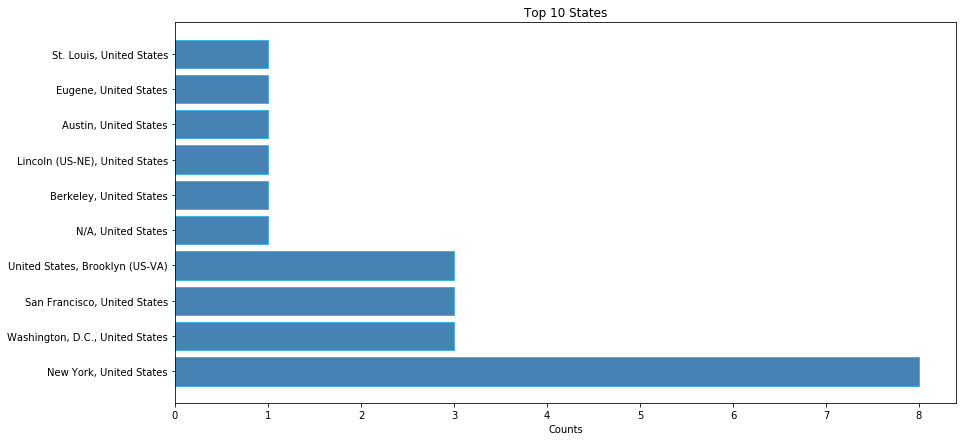

In [310]:
fig = plt.figure(figsize=(14,7)) #adjust size
plt.barh(country.index, country.Location,color = 'steelblue',edgecolor = '#40b4e5') #change color of the bars
plt.title('Top 10 States') #plot title and label name
plt.xlabel('Counts')
# plt.ylabel('counts')
plt.show()

# 纽约独占鳌头 再来看看contribution的平均值

# What is mean of programming days in each US cities

In [270]:
import plotly
import plotly.graph_objs as go

In [318]:
# offline 不好展示 暂时不用
pd_df2 = dfs.groupby(['Location'])['Times'].mean().reset_index().sort_values("Times",ascending=False)
data = [go.Bar(x=pd_df2.Location,
            y=pd_df2.Times)]
plotly.offline.plot(data, filename='country_with_average_times_bar')

# 在jupyter notebook上看不到


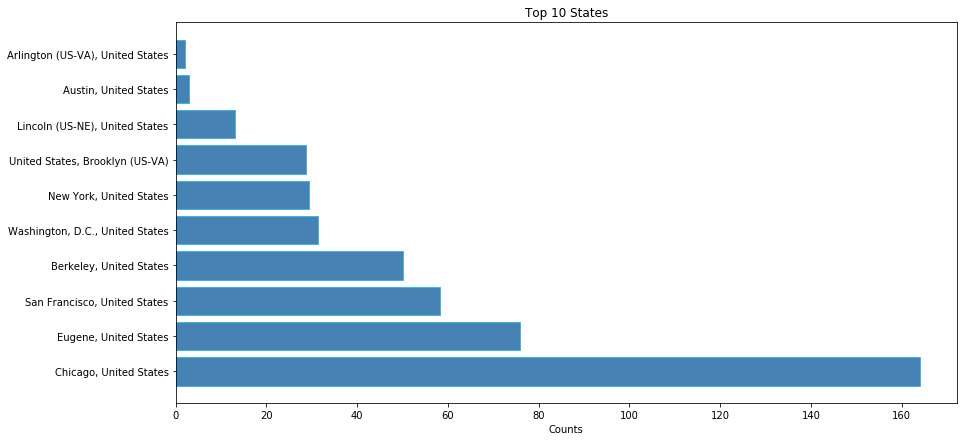

In [340]:
# 很有趣的是 最大mean居然不是New York 原来纽约记者有GitHub的虽然多，但是很多人每年的编程天数并不高 所以mean的值并不高
# 但是Chicago一个老哥就干了160天 没有人拖后腿 所以一支独秀了
# 从这个角度再来看，突然发现美国的数据新闻记者虽然多，但是其实GitHub contributions are not the most one, whether times or whole contributions

pd_df2 = dfs.groupby(['Location'])['Times'].mean().reset_index().sort_values("Times",ascending=False)[:10]
fig = plt.figure(figsize=(14,7)) #adjust size
plt.barh(pd_df2.Location,pd_df2.Times, color = 'steelblue',edgecolor = '#40b4e5') #change color of the bars
plt.title('Top 10 States') #plot title and label name
plt.xlabel('Counts')
# plt.ylabel('counts')
plt.show()



- It's interesting that the biggest mean isn't New York. Actually, although many New York reporters have GitHub, many people don't have habit of programming. So pull down the overall level and the value of mean is not high.

- A brother in Chicago has been working for 160 days. No one is dragging his legs. So a solo show. Most importantly, there is an issue, not the city with the most data journalists will have the most contributions.
- ps：Because the amount of data is relatively small, such analysis is not reasonable, but can be extended to further topics.


# Further Topic

From a global perspective, we find that the data journalists who contributed the most in Github are not located in the United States.